In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

: 

Data Import

In [4]:
data = pd.read_csv('Train.csv')

In [5]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


<Axes: xlabel='label'>

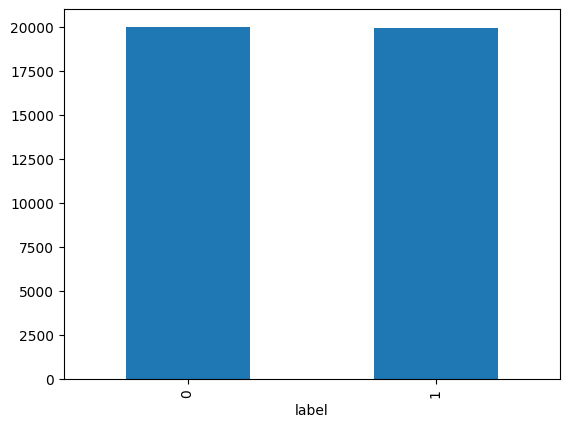

In [4]:
data['label'].value_counts().plot(kind='bar')

In [5]:
data['text'][100]

'In the history of cinema, every great film-maker had to create a first film. Many times when viewed after they have become a success, a light bulb goes on in our heads. The connection is made and we see the solid foundation from where they started. So it is with HORSES ON MARS. It is the subtle humor woven around a seemingly straight-forward narrative that tells a great story, but allows you to enjoy the visuals at the same time. In the imagery, I found great attention to detail and a production polish that is rare in any student film.<br /><br />A young film-maker always has improvements to be made. But if Mr. Anderson continues on this path, I think we will someday look back on this film as the beginning a great career.<br /><br />You should definitely view this film. Nothing beats the grandeur of the big screen.'

Data preprocessing

In [ ]:

import re
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

: 

In [7]:
stop_words = stopwords.words('english')

def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    text = re.sub(r'[\W+]', ' ', text.lower())

    proter = PorterStemmer()
    text = [proter.stem(word) for word in text.split() if word not in stop_words]

    return " ".join(text)


In [8]:
preprocessing(data['text'][100])

'histori cinema everi great film maker creat first film mani time view becom success light bulb goe head connect made see solid foundat start hors mar subtl humor woven around seemingli straight forward narr tell great stori allow enjoy visual time imageri found great attent detail product polish rare student film young film maker alway improv made mr anderson continu path think someday look back film begin great career definit view film noth beat grandeur big screen'

In [9]:
data['text'] = data['text'].apply(lambda x:preprocessing(x))

In [10]:
data.head()

,text,label
0,grew b 1965 watch love thunderbird mate school...,0
1,put movi dvd player sat coke chip expect hope ...,0
2,peopl know particular time past like feel need...,0
3,even though great interest biblic movi bore de...,0
4,im die hard dad armi fan noth ever chang got t...,1


Finding Words

In [11]:
positivedata = data[data['label'] == 1]
positivedata = positivedata['text']
negativedata = data[data['label'] == 0]
negativedata = negativedata['text']

from collections import Counter

In [12]:
#Positive data
positive_word = ' '.join(positivedata).split()
positivedata_word_count = Counter(positive_word)
positive_word_common = positivedata_word_count.most_common(10)

#negative data
negative_word = ' '.join(negativedata).split()
negativedata_word_count = Counter(negative_word)
negative_word_common = negativedata_word_count.most_common(10)

In [13]:
print(positive_word_common)

[('film', 40689), ('movi', 36011), ('one', 22659), ('like', 16602), ('time', 13325), ('good', 12221), ('see', 12180), ('charact', 11332), ('stori', 11324), ('make', 11135)]


In [14]:
print(negative_word_common)

[('movi', 46775), ('film', 36000), ('one', 21721), ('like', 19715), ('make', 12977), ('even', 12371), ('time', 12320), ('get', 12222), ('good', 12051), ('watch', 11981)]


Feature extraction

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None, use_idf=True, norm='l2', smooth_idf=True)
y = data.label.values
x = tfidf.fit_transform(data.text)

Training ML Model

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=1, shuffle=False, test_size=0.25)

In [18]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv = 6, scoring='accuracy', random_state=0, n_jobs=1, verbose=3, max_iter=500).fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

Acccuracy test

In [19]:
from sklearn import metrics

print("Accuracy : ", metrics.accuracy_score(Y_test, Y_pred))

Accuracy :  0.8932


Pickle

In [20]:
import pickle
pickle.dump(clf, open('clf.pkl', 'wb'))
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))

Predction

In [21]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]
    comment_vector = tfidf.transform(comment_list)
    predction = clf.predict(comment_vector)[0]
    if(predction):
        return 'Positive comment'
    else:
        return 'Negative comment'

In [22]:
p = prediction('ironman is masterpiece')
print(p)

Positive comment
